In [20]:
 #This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [21]:
import pandas as pd
Admission_Predict = pd.read_csv("/content/drive/MyDrive/admission_prediction.csv")

In [23]:
df=pd.read_csv("/content/drive/MyDrive/admission_prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df['Chance of admit class']=df['Chance of Admit '].apply(lambda x:1 if x>0.80 else 0)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [24]:
## Shape of data
print(' Shape of Data \n Rows :',df.shape[0],', Columns : ',df.shape[1])

 Shape of Data 
 Rows : 400 , Columns :  9


In [25]:
## Checking for null values
missing_values = df.isnull().sum() * 100/len(df)
missing_values_df = pd.DataFrame({'Column_name':df.columns,'Missing_percent':missing_values})
missing_values_df

,Column_name,Missing_percent
Serial No.,Serial No.,0.0
GRE Score,GRE Score,0.0
TOEFL Score,TOEFL Score,0.0
University Rating,University Rating,0.0
SOP,SOP,0.0
LOR,LOR,0.0
CGPA,CGPA,0.0
Research,Research,0.0
Chance of Admit,Chance of Admit,0.0


In [26]:
#iNFORMATION ABOUT THE DATA we can observe data doesnot have any Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Skewness of chance of admit :  -0.3534480999327828


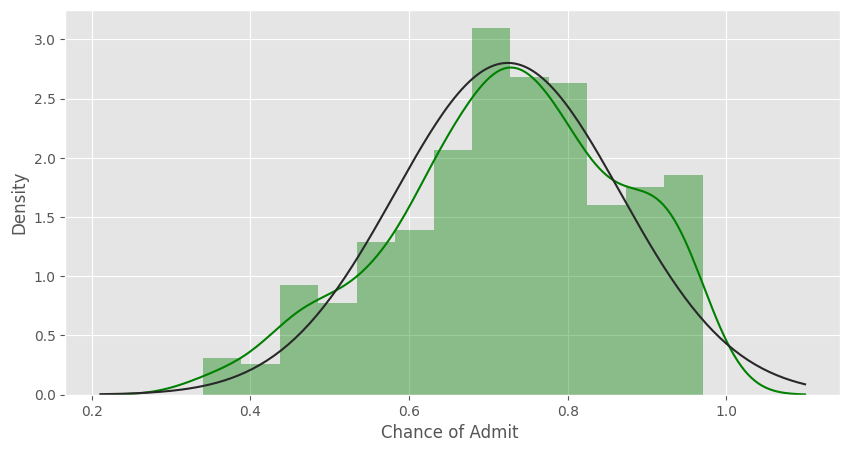

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# lets see the distribution for the target variable
print('Skewness of chance of admit : ',df['Chance of Admit '].skew())
plt.figure(figsize = (10,5))
sns.distplot(df['Chance of Admit '],kde = True,color = 'g',fit = stats.norm)
plt.show()

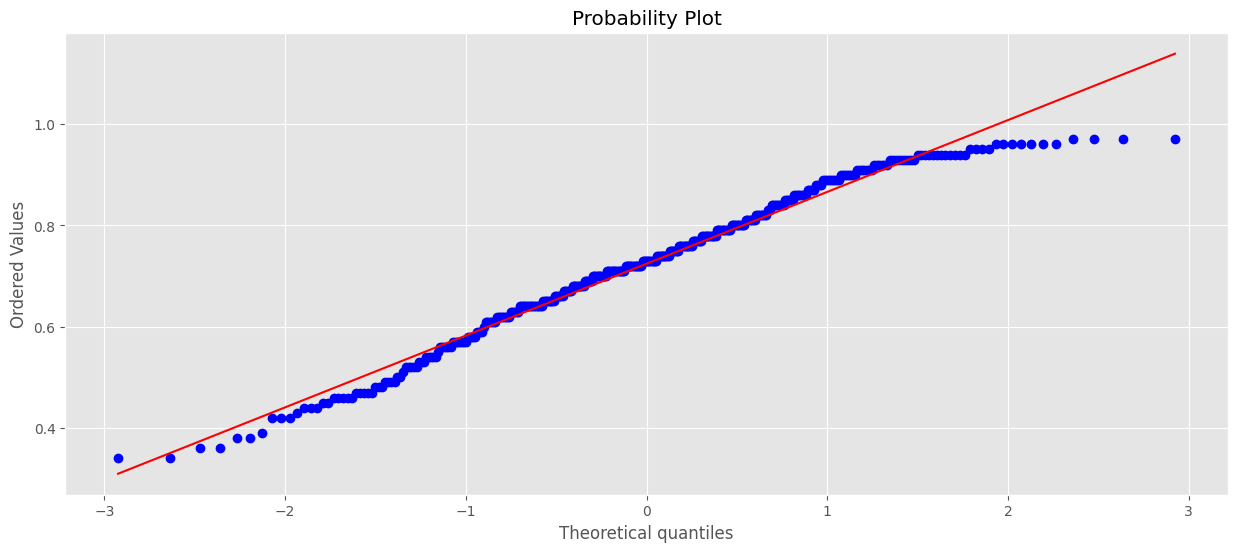

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
rs = stats.probplot(df['Chance of Admit '],plot = ax)
plt.show()

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
X = df[features]
y = df['Chance of Admit ']

In [31]:
X = df[features]
y = df['Chance of Admit ']
trainX ,testX , trainY, testY = train_test_split(X, y, train_size = 0.7,random_state = 5)

In [32]:
lin_reg = LinearRegression()
predY = lin_reg.fit(trainX,trainY).predict(testX)
m1 = r2_score(testY,predY)
print('Accuracy/RSquared : ',r2_score(testY, predY))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(testY,predY)))

Accuracy/RSquared :  0.7721103482184821
Root Mean Squared Error :  0.06067578589736038


In [33]:
dec_tree = DecisionTreeRegressor()
predY = dec_tree.fit(trainX,trainY).predict(testX)
m2 = dec_tree.score(testX,testY)
print('Accuracy : ',dec_tree.score(testX, testY))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(testY,predY)))


Accuracy :  0.5597846552231083
Root Mean Squared Error :  0.08433069824605192


<Axes: >

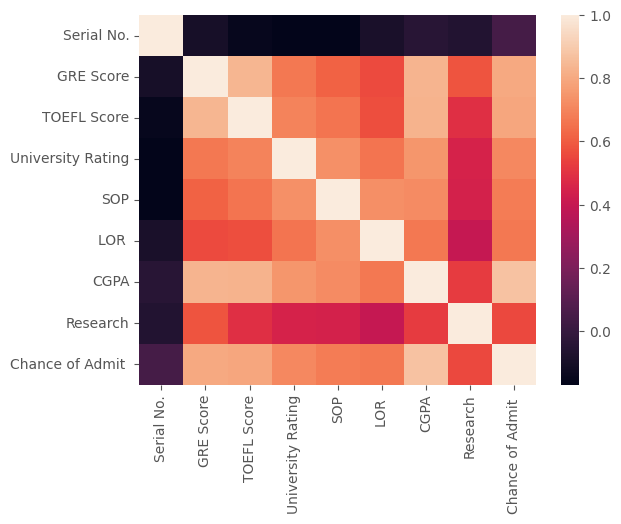

In [34]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(trainX,trainY)
print('Mean absolute error for RF model: %0.4f' %mean_absolute_error(testY,rf_model.predict(testX)))

Mean absolute error for RF model: 0.0497


<Axes: xlabel='value', ylabel='Feature'>

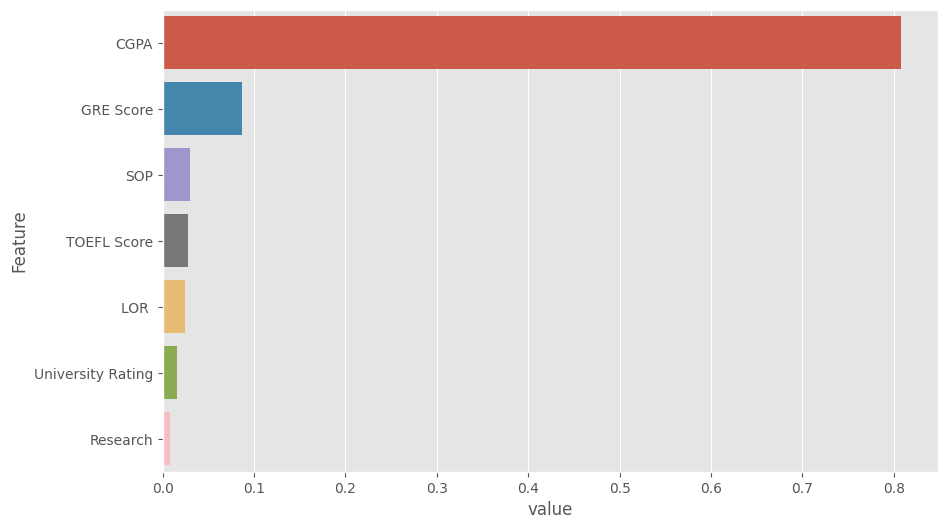

In [36]:
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="value", y="Feature", data=feature_importance.sort_values(by="value", ascending=False))
